### Relatório Preliminar -Matheus Freitas Sant'Ana

In [66]:
import subprocess
import time
import os
import sys
import matplotlib.pyplot as plt
import random
import statistics
import numpy as np
import pandas as pd


### Função para rodar executável e calcular tempo

In [56]:
def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

        # print('Saída:', proc.stdout)
        # print('Stderr:', proc.stderr)
        # print('Tempo total(s):', end - start)
        f.close()
    return (proc.stdout, end - start)

### Gerando arquivos de entrada

Aqui são gerados alguns arquivos de entrada com que vão progressivamente aumentando, para que sejam medidos a performance de cada heurística com entradas diferentes.

In [57]:
def gerador_entrada(n, m):
    for i in range(0, 10):
        f = open(f'./inputs/in-{i}.txt', 'w')
        seq=[str(n)+'\n',
            str(m)+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
            ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
    f.close()    

In [58]:
def gerador_entrada_BE(n, m, i):
    f = open(f'./inputs/in-{i}.txt', 'w')
    seq=[str(n)+'\n',
        str(m)+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
        ''.join(random.choices(['A','T','C','G','-'],k=m))]
    f.writelines(seq)
    f.close() 

### Explorando cada heurística

In [59]:
with open('./dna.seq') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./BuscaExaustiva'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print(proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Melhor resultado

Score alinhamento: 8
Subsequência A:    G--A
Subsequência B:    G--A

Stderr: 
Tempo total(s): 0.5488257999968482


In [60]:
with open('./dna.seq') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./SmithWaterman'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print(proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

 G--A
****
 G--A

Stderr: 
Tempo total(s): 0.33413210000435356


#### Heurística SmithWaterman

Essa primeira heurística leva em conta a construção de um amatriz de deslocamentos em que o score de cada cé

In [ ]:
with open('./dna.seq') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./SmithWaterman'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print(proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

[10, 5010, 10010, 15010, 20010, 25010, 30010, 35010, 40010, 45010, 50010, 55010, 60010, 65010, 70010, 75010, 80010, 85010, 90010, 95010, 100010, 105010, 110010, 115010, 120010, 125010, 130010, 135010, 140010, 145010, 150010, 155010, 160010, 165010, 170010, 175010, 180010, 185010, 190010, 195010, 200010, 205010, 210010, 215010, 220010, 225010, 230010, 235010, 240010, 245010, 250010, 255010, 260010, 265010, 270010, 275010, 280010, 285010, 290010, 295010] [0.3118151999951806, 0.3224752999958582, 0.3123990000021877, 0.3204267999972217, 0.33754989999579266, 0.33593509999627713, 0.33870890000252984, 0.30443580000428483, 0.3132748000061838, 0.32274580000375863]


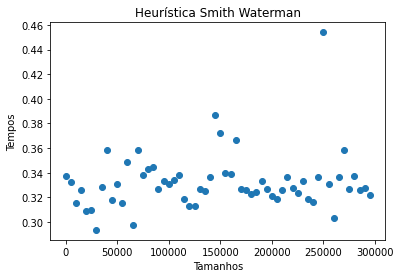

In [61]:
tamanhos_SW = []
media_tempo_SW = []

n = 10
m = 10

for i in range(0, 60):
    tempos_SW = []
    gerador_entrada(n, m)

    for i in range(0, 10):
        tempos_SW.append(roda_com_entrada('./SmithWaterman', f'./inputs/in-{i}.txt')[1])
    
    tamanhos_SW.append(n)
    media_tempo_SW.append(statistics.mean(tempos_SW))
    

    n += 5000
    m += 5000 


print(tamanhos_SW, tempos_SW)
plt.scatter(tamanhos_SW, media_tempo_SW)
plt.title('Heurística Smith Waterman')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.show()

#### Heurística Aleatorização

[10, 5010, 10010, 15010, 20010, 25010, 30010, 35010, 40010, 45010, 50010, 55010, 60010, 65010, 70010, 75010, 80010, 85010, 90010, 95010, 100010, 105010, 110010, 115010, 120010, 125010, 130010, 135010, 140010, 145010, 150010, 155010, 160010, 165010, 170010, 175010, 180010, 185010, 190010, 195010, 200010, 205010, 210010, 215010, 220010, 225010, 230010, 235010, 240010, 245010, 250010, 255010, 260010, 265010, 270010, 275010, 280010, 285010, 290010, 295010] [0.39640449998842087, 0.43509770001401193, 0.3845949999958975, 0.4253084999945713, 0.4230497000098694, 0.382057499999064, 0.371774600003846, 0.37138949999643955, 0.3987505999975838, 0.34506490000057966]


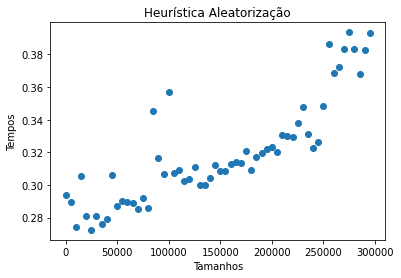

In [62]:
tamanhos_AL = []
media_tempo_AL = []

n = 10
m = 10

for i in range(0, 60):
    tempos_AL = []
    gerador_entrada(n, m)

    for i in range(0, 10):
        tempos_AL.append(roda_com_entrada('./Aleatorizacao', f'./inputs/in-{i}.txt')[1])
    
    tamanhos_AL.append(n)
    media_tempo_AL.append(statistics.mean(tempos_AL))
    

    n += 5000
    m += 5000

print(tamanhos_AL, tempos_AL)
plt.scatter(tamanhos_AL, media_tempo_AL)
plt.title('Heurística Aleatorização')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.show()

#### Busca Exaustiva

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43] [38.53374729999632]


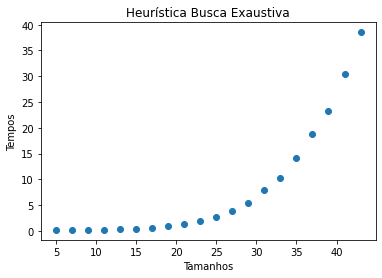

In [64]:
tamanhos_BE = []
media_tempo_BE = []

n = 5
m = 5

for i in range(0, 20):
    tempos_BE = []
    gerador_entrada_BE(n, m, i)
    
    tempos_BE.append(roda_com_entrada('./BuscaExaustiva', f'./inputs/in-{i}.txt')[1])
    
    tamanhos_BE.append(n)
    media_tempo_BE.append(statistics.mean(tempos_BE))
    

    n += 2
    m += 2

print(tamanhos_BE, tempos_BE)
plt.scatter(tamanhos_BE, media_tempo_BE)
plt.title('Heurística Busca Exaustiva')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.show()

#### Busca Exaustiva Truncado

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43] [0.7606716000009328]


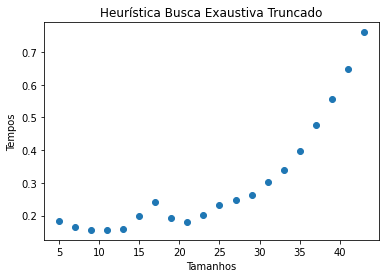

In [ ]:
tamanhos_BT = []
media_tempo_BT = []

n = 5
m = 5

for i in range(0, 20):
    tempos_BT = []
    gerador_entrada_BE(n, m, i)
    
    tempos_BT.append(roda_com_entrada('./BuscaExaustivaTruncado', f'./inputs/in-{i}.txt')[1])
    
    tamanhos_BT.append(n)
    media_tempo_BT.append(statistics.mean(tempos_BT))
    

    n += 2
    m += 2

print(tamanhos_BT, tempos_BT)
plt.scatter(tamanhos_BT, media_tempo_BT)
plt.title('Heurística Busca Exaustiva Truncado')
plt.xlabel('Tamanhos')
plt.ylabel('Tempos')
plt.show()

#### Comparação desempenho

In [71]:
n = 5
m = 5

for i in range(0, 3):
    gerador_entrada_BE(n, m, i)
    with open(f'./inputs/in-{i}.txt') as f:
        
        proc_SW = subprocess.run(['./SmithWaterman'], input=f.read(), text=True, capture_output=True)
        proc_AL = subprocess.run(['./SmithWaterman'], input=f.read(), text=True, capture_output=True)

        print(proc.stdout)
    
    n += 25
    m += 25

-
*
-

Stderr: 
Tempo total(s): 0.1824674999952549
--GGC_T_AGCCGCTAT-TTCCCT__GT-GT
*****  ********** *  ** * *****
-CGGCGTAAG__G_TTTCTTTGATGGG--GT

Stderr: 
Tempo total(s): 0.16308709999429993
G_A-T-ACA-CCGGT-GCC-T--C-TTGGTTGTA__-G_C-G-T_TGG--T_GG_A_A_AG_TAC
*** ** * * ** ****** * *** **  ** * *   * ** **** ***  **   *** *
GTA-T___T-__GAT_GAC-_--_-___G_T_AA-C-G-C-G_TA-AGCATGGGCA-ACGG-CAC

Stderr: 
Tempo total(s): 0.16242249999777414


In [ ]:
df_results = pd.DataFrame({'R² (teste)': r2_rf_test,
                           'R² (treinamento)': r2_rf_train,
                           'MAPE (teste)': acuracia_rf,
                           'MAPE (treinamento)': acuracia_rf_train},
                            index=['Random Forest'])